# Assignment 2 - Charged Particles in Magnetic Fields
## Scientific Programming in Python with Applications in Physics
### Erwan Larié

In [149]:
import scipy
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

#### Task 1
Consider a proton moving in x-direction in a homogeneous magnetic field with a field axis in zdirection. The proton has an energy of 1 MeV and the field strength is 3 T. Using an ordinary differential equation solver, follow the motion of this particle for 1 microsecond. Plot and describe the result.

In [150]:
#Testing the value of constants to check its sign
print(scipy.constants.e)

1.602176634e-19


*We will be neglecting the electric field in this case as the magnetic field is constant in time.
By computing the Lorentz force and applying Newton's second law, we'll be able to determine the acceleration of the proton and apply this acceleration in the derivation.*

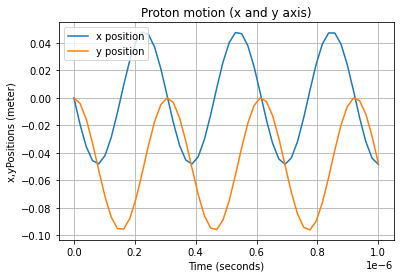

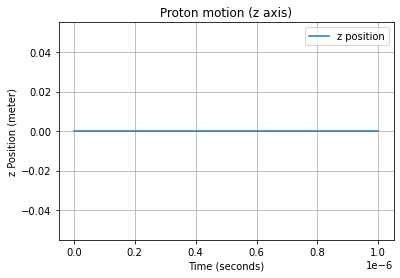

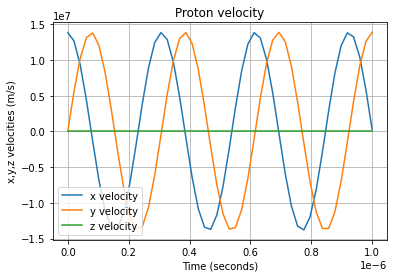

In [151]:
# Let us define constants we will use later as global variables
proton_charge = scipy.constants.e
mass_proton = scipy.constants.proton_mass
# Defining the magnetic field along the z axis
B = np.array([0,0,3])

def lorentz_force(t,y):
    #Let us unpack position and velocity values in order to better manipulate them
    x,y,z,vx,vy,vz = y
    v = np.array([vx,vy,vz])
    # Calculate the generated Lorentz force
    F_Lorentz = proton_charge*(np.cross(v,B))
    ax = F_Lorentz[0] / mass_proton
    ay = F_Lorentz[1] / mass_proton
    az = F_Lorentz[2] / mass_proton
    dydt = np.array([vx,vy,vz,ax,ay,az])
    return dydt
# Initial energy of 1 MeV
Energy = scipy.constants.eV*10**6
# Assuming E = 1/2 m v**2
vx_0 = np.sqrt(2*Energy/mass_proton)
initial_coordinates = np.array([0,0,0,vx_0,0,0])
# 1 microsecond timelapse
time_range = (0,10**(-6))
observed_time = np.linspace(0,10**(-6),num = 50)

proton_motion = solve_ivp(lorentz_force, time_range, initial_coordinates, t_eval=observed_time)

fig, ax = plt.subplots()
ax.plot(proton_motion.t, proton_motion.y[0],label='x position')
ax.plot(proton_motion.t, proton_motion.y[1],label='y position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('x,yPositions (meter)')
ax.set_title('Proton motion (x and y axis)');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(proton_motion.t, proton_motion.y[2],label='z position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('z Position (meter)')
ax.set_title('Proton motion (z axis)');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(proton_motion.t, proton_motion.y[3],label='x velocity')
ax.plot(proton_motion.t, proton_motion.y[4],label='y velocity')
ax.plot(proton_motion.t, proton_motion.y[5],label='z velocity')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('x,y,z velocities (m/s)')
ax.set_title('Proton velocity');
ax.legend()
ax.grid(True)

*As we can see from the two plots, the z component is not affected by Lorentz's force as expected and remains constant in motion.
The x and y components on the other hand follow a sinusoidal path: the y component is affected by the magnetic field in the z direction.
One oddity that can be noted is that despite having a positive velocity, the motion of the particle seems to be going in the negative direction. This can attributed to the an inappropriate granularity provided to the ODE solver which consequently averages values.
When plotting over 0.1 $\mu s$ the motion seems to make more sense as seen below.*

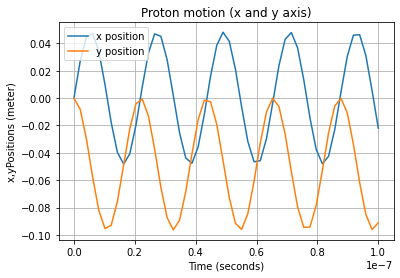

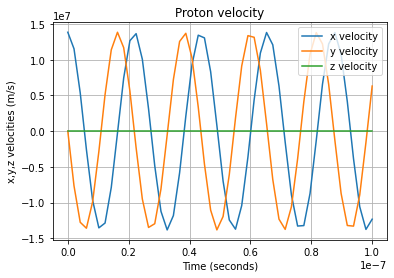

In [152]:
new_observed_time = np.linspace(0,10**(-7),num = 50)

new_proton_motion = solve_ivp(lorentz_force, time_range, initial_coordinates, t_eval=new_observed_time)

fig, ax = plt.subplots()
ax.plot(new_proton_motion.t, new_proton_motion.y[0],label='x position')
ax.plot(new_proton_motion.t, new_proton_motion.y[1],label='y position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('x,yPositions (meter)')
ax.set_title('Proton motion (x and y axis)');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(new_proton_motion.t, new_proton_motion.y[3],label='x velocity')
ax.plot(new_proton_motion.t, new_proton_motion.y[4],label='y velocity')
ax.plot(new_proton_motion.t, new_proton_motion.y[5],label='z velocity')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('x,y,z velocities (m/s)')
ax.set_title('Proton velocity');
ax.legend()
ax.grid(True)

### Task 2
Launch the same proton (energy 1 MeV) in the same magnetic field (3 T, parallel to the z-axis),
but this time the initial proton velocity has both an x- and a z-component. Follow the motion of
this particle for 1 microsecond. Plot and describe the result

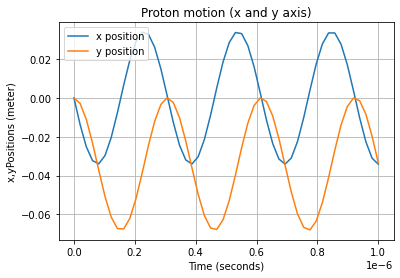

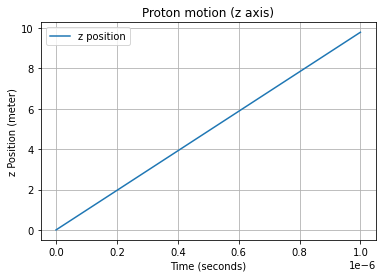

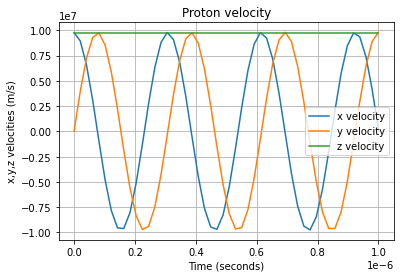

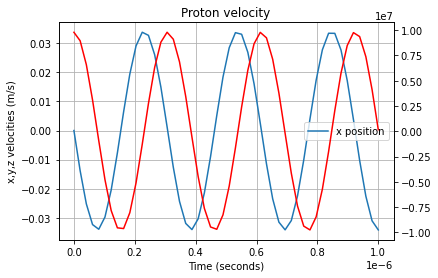

In [155]:
# Starting with vx_0 = vz_0 - half the energy on each component.
vx_0 = np.sqrt(Energy/mass_proton)
vz_0 = np.sqrt(Energy/mass_proton)

initial_coordinates_task2 = np.array([0,0,0,vx_0,0,vz_0])

proton_motion_task2 = solve_ivp(lorentz_force, time_range, initial_coordinates_task2, t_eval=observed_time)

fig, ax = plt.subplots()
ax.plot(proton_motion_task2.t, proton_motion_task2.y[0],label='x position')
ax.plot(proton_motion_task2.t, proton_motion_task2.y[1],label='y position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('x,yPositions (meter)')
ax.set_title('Proton motion (x and y axis)');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(proton_motion_task2.t, proton_motion_task2.y[2],label='z position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('z Position (meter)')
ax.set_title('Proton motion (z axis)');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(proton_motion_task2.t, proton_motion_task2.y[3],label='x velocity')
ax.plot(proton_motion_task2.t, proton_motion_task2.y[4],label='y velocity')
ax.plot(proton_motion_task2.t, proton_motion_task2.y[5],label='z velocity')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('x,y,z velocities (m/s)')
ax.set_title('Proton velocity');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(proton_motion_task2.t, proton_motion_task2.y[0],label='x position')
ax2 = ax.twinx()
ax2.plot(proton_motion_task2.t, proton_motion_task2.y[3],label='x velocity', color='red')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('x,y,z velocities (m/s)')
ax.set_title('Proton velocity');
ax.legend()
ax.grid(True)

*Once again, the z component remains unaffected by the magnetic field in the z direction: its velocity remains constant and its motion in z stays linear.*

### Task 3
Repeat Task 2, but make a 3d plot of your results.

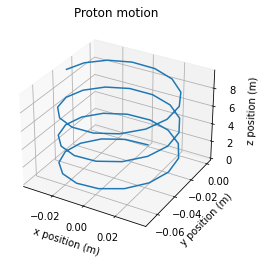

In [156]:
ax = plt.axes(projection='3d')

ax.plot3D(proton_motion_task2.y[0], proton_motion_task2.y[1], proton_motion_task2.y[2])
ax.set_xlabel("x position (m)")
ax.set_ylabel("y position (m)")
ax.set_zlabel("z position (m)")
ax.set_title('Proton motion');


*As seen previously, the proton follows a circular motion in the x-y plane represented previously by sinusoidal motions and the proton is moving linearly in the z direction.*

### Task 4
Change the magnetic field so that it is cylindrically symmetric around the z-axis. If r is the distance
from the z-axis, in meters, the magnitude of the magnetic field is 9T/r. The direction of the B-field
at any point should be along a ring around z in the clockwise direction.
Launch a 1 MeV proton at r = 3 m straight up (in the z direction) and plot the first microsecond.
Describe the result.
It can be noted that the field at r = 3 m is very similar to the case in question 1 with a gentle
gradient added. The solution should be very similar to that of question 1.

*Since the magnetic field varies depending on the position, we will define a new function to apply lorentz's force that redefines the magnetic field depending on the proton position. To simplify the process, the coordinate system is switched to cylindrical coordinates with r, $\theta$ and z components.*

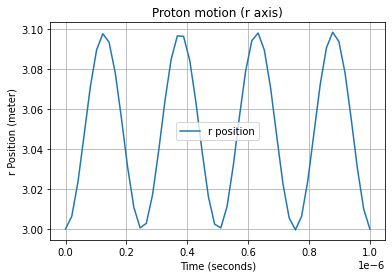

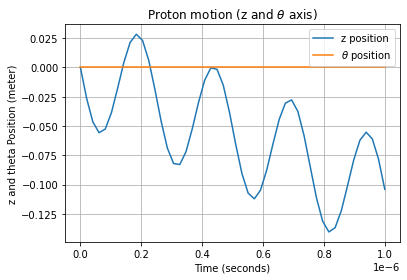

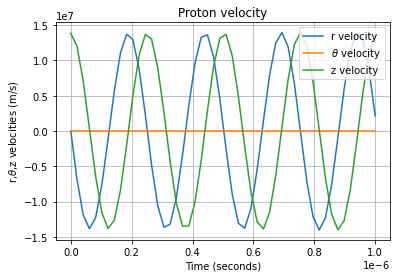

In [158]:
def magnetic_field(r):
    magnitude = 9/r
    # Clockwise so in the minus theta direction
    field = np.array([0,-magnitude,0])
    return field

def dynamic_lorentz_force(t,y):
    #Let us unpack position and velocity values in order to better manipulate them
    r,theta,z,vr,v_theta,vz = y
    v = np.array([vr,v_theta,vz])
    # Calculate the generated Lorentz force
    F_Lorentz = proton_charge*(np.cross(v,magnetic_field(r)))
    ar = F_Lorentz[0] / mass_proton
    a_theta = F_Lorentz[1] / mass_proton
    az = F_Lorentz[2] / mass_proton
    dydt = np.array([vr,v_theta,vz,ar,a_theta,az])
    return dydt
r_0 = 3
vz_0 = np.sqrt(2*Energy/mass_proton)
initial_coordinates_task4 = np.array([r_0,0,0,0,0,vz_0])

proton_motion_task4 = solve_ivp(dynamic_lorentz_force, time_range, initial_coordinates_task4, t_eval=observed_time)

fig, ax = plt.subplots()
ax.plot(proton_motion_task4.t, proton_motion_task4.y[0],label='r position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('r Position (meter)')
ax.set_title('Proton motion (r axis)');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(proton_motion_task4.t, proton_motion_task4.y[2],label='z position')
ax.plot(proton_motion_task4.t, proton_motion_task4.y[1],label=r'$\theta$ position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('z and theta Position (meter)')
ax.set_title(r'Proton motion (z and $\theta$ axis)');
ax.legend()
ax.grid(True)

fig, ax = plt.subplots()
ax.plot(proton_motion_task4.t, proton_motion_task4.y[3],label='r velocity')
ax.plot(proton_motion_task4.t, proton_motion_task4.y[4],label=r'$\theta$ velocity')
ax.plot(proton_motion_task4.t, proton_motion_task4.y[5],label='z velocity')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'r,$\theta$,z velocities (m/s)')
ax.set_title('Proton velocity');
ax.legend()
ax.grid(True)

*Similarly as in part 1, the component parallel to the direction of the magnetic field (in that case, the $\hat\theta$ direction) remains unaffected. The two other components follow a sinusoidal motion. One difference here is that a small gradient is applied on the z component caused by the magnetic field being oriented in the $-\hat\theta$ direction.*

### Task 5
Repeat question 4, but make a 3d plot of your results.

*In order to keep the same graph disposition as previously, we'll convert the results from cylindrical to cartesian coordinates.*

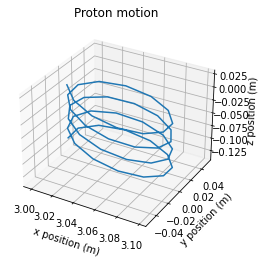

In [159]:
ax = plt.axes(projection='3d')
r = proton_motion_task4.y[0]
theta = proton_motion_task4.y[1]
z = proton_motion_task4.y[2]
ax.plot3D(r*np.cos(theta), r*np.sin(theta), proton_motion_task4.y[2])
ax.set_xlabel("x position (m)")
ax.set_ylabel("y position (m)")
ax.set_zlabel("z position (m)")
ax.set_title('Proton motion');

*We can observe a similar motion as before on the x and y components and a motion in z coming from the negative gradient applied on this direction by the magnetic field.*

### Task 6
Evaluate the drift velocity in question 4.

*Assuming the drift velocity is the difference in velocity caused by the magnetic field on the z axis, we can estimate its value by fitting a linear function to the z motion: this linear function will provide the average displacement of the z position over time.*

-89190.02840527998 m/s


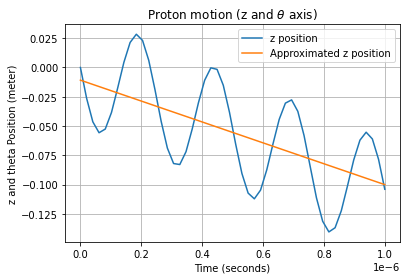

In [160]:

coef, diff = np.polyfit(proton_motion_task4.t,proton_motion_task4.y[2],1)
fig, ax = plt.subplots()
ax.plot(proton_motion_task4.t, proton_motion_task4.y[2],label='z position')
ax.plot(proton_motion_task4.t, proton_motion_task4.t*coef + diff,label=r'Approximated z position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('z and theta Position (meter)')
ax.set_title(r'Proton motion (z and $\theta$ axis)');
ax.legend()
ax.grid(True)

print(coef,"m/s")

*This provides a rough estimate of the drift velocity having a magnitude of the order of $8.92 \times 10^4 m/s$ in the negative z direction.*
*When estimating visually, the proton moves about approximately 0.1 meter in the -z direction over 1ms, which gives a drift of about $10^5 m/s$ which corresponds approximately to the order provided by the fitting.
One downside however is the presence of an offset in the plotted linear function.
A more appropriate solution might be offered by* **numpy.linalg.lstsq** 

[-105248.64439491]


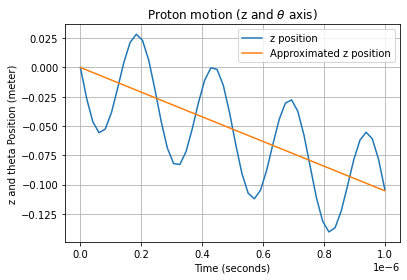

In [162]:
x = proton_motion_task4.t[:,np.newaxis]
coef,_a,_b,_c= np.linalg.lstsq(x,proton_motion_task4.y[2],rcond=None)
fig, ax = plt.subplots()
ax.plot(proton_motion_task4.t, proton_motion_task4.y[2],label='z position')
ax.plot(proton_motion_task4.t, proton_motion_task4.t*coef,label=r'Approximated z position')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('z and theta Position (meter)')
ax.set_title(r'Proton motion (z and $\theta$ axis)');
ax.legend()
ax.grid(True)
print(coef)

*In this case, the velocity drift is estimated to have a mgnitude of $1.05\times 10^5$ which seems closer to our guess.*